In [89]:
%matplotlib inline

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [91]:
iris = pd.read_csv('dataNew.csv')

In [92]:
iris.shape

(101, 10)

In [93]:
iris.head()

,likelyhood,trade,confusion,copyright,intellectual,office,marks,constitutional,similar,Label
0,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,1,0,0,0,1
3,0,1,0,0,1,1,0,0,0,1
4,0,1,0,0,1,1,0,0,0,1


In [94]:
# iris = iris.sort_values(by=['Label'])

In [95]:
iris.head()

,likelyhood,trade,confusion,copyright,intellectual,office,marks,constitutional,similar,Label
0,0,1,0,0,1,1,0,0,0,1
1,0,1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,1,0,0,0,1
3,0,1,0,0,1,1,0,0,0,1
4,0,1,0,0,1,1,0,0,0,1


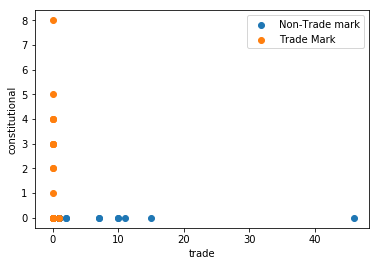

In [96]:
plt.scatter(iris[:50].trade, iris[:50].constitutional, label='Non-Trade mark')
plt.scatter(iris[50:].trade, iris[50:].constitutional, label='Trade Mark')
plt.xlabel('trade')
plt.ylabel('constitutional')
plt.legend(loc='best')

In [97]:
X = iris.drop(labels=['Label'], axis=1).values
Y = iris.Label.values

In [98]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

In [99]:
trainIndex = np.random.choice(len(X), round(len(X) * 0.8), replace=False)

In [100]:
testIndex = np.array(list(set(range(len(X))) - set(trainIndex)))
trainX = X[trainIndex]
trainY = Y[trainIndex]
testX = X[testIndex]
testY = Y[testIndex]

In [101]:
def min_max_normalized(data):
    colMax = np.max(data, axis=0)
    colMin = np.min(data, axis=0)
    return np.divide(data - colMin, colMax - colMin)

In [102]:
# trainX = min_max_normalized(trainX)
# testX = min_max_normalized(testX)

In [103]:
W = tf.Variable(tf.random_normal(shape=[9, 1]), name='W')
b = tf.Variable(tf.random_normal(shape=[1, 1]), name= 'b')
init = tf.global_variables_initializer()

In [104]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 9])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [105]:
# Declare the model you need to learn
model = tf.matmul(data, W) + b

In [106]:
# Declare vector L2 'norm' function squared
l2_norm = tf.reduce_sum(tf.square(W))

In [107]:
# Declare loss function
# Loss = max(0, 1-pred*actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha
alpha = tf.constant([0.05])
# Margin term in loss
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model, target))))
# Put terms together
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [108]:
# Declare prediction function
prediction = tf.sign(model)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, target), tf.float32))

In [109]:
# Declare optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
goal = optimizer.minimize(loss)

In [110]:
sess = tf.Session()
sess.run(init)

In [111]:
batch_size = 20
iter_num = 1000

In [112]:
loss_trace = []
train_acc = []
test_acc = []

In [113]:
for epoch in range(iter_num):
    batchIndex = np.random.choice(len(trainX), size=batch_size)
    batchTrainX = trainX[batchIndex]
    batchTrainY = np.matrix(trainY[batchIndex]).T
    sess.run(goal, feed_dict={data: batchTrainX, target: batchTrainY})

    temp_loss = sess.run(loss, feed_dict={data: batchTrainX, target: batchTrainY})
    temp_train_acc = sess.run(accuracy, feed_dict={data: trainX, target: np.matrix(trainY).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: testX, target: np.matrix(testY).T})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    if (epoch + 1) % 200 == 0:
        # print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc, temp_test_acc))
        print(temp_train_acc, temp_test_acc)

0.69135803 0.4
0.9876543 1.0
0.9876543 1.0
1.0 1.0
1.0 1.0


In [ ]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# accuracy
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
sess.run(W)

In [ ]:
sess.run(b)